In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv('researchfinal.csv')
data.head()

,INDEX,Date,MAX,MIN,AW,RF,SSH
0,42971,01-01-1975,28.0,15.4,7,0.0,7.6
1,42971,02-01-1975,28.0,15.8,5,0.0,6.8
2,42971,03-01-1975,28.5,15.0,9,0.0,5.7
3,42971,04-01-1975,27.6,18.5,12,0.0,7.1
4,42971,05-01-1975,26.4,15.6,13,0.0,10.2


In [5]:
data.isnull().sum()

INDEX       0
Date        0
MAX        28
MIN        19
AW        913
RF        768
SSH      8843
dtype: int64

In [6]:
data.tail()

,INDEX,Date,MAX,MIN,AW,RF,SSH
17661,42971,26-06-2024,36.0,26.4,NaN,7.3,NaN
17662,42971,27-06-2024,33.6,27.1,NaN,21.3,NaN
17663,42971,28-06-2024,34.0,25.8,NaN,39.5,NaN
17664,42971,29-06-2024,32.9,26.6,NaN,0.0,NaN
17665,42971,30-06-2024,32.0,25.7,NaN,29.9,NaN


In [7]:
data.drop(["AW" , 'RF' , 'SSH','INDEX'] , axis=1, inplace=True)

In [8]:
data.head()

,Date,MAX,MIN
0,01-01-1975,28.0,15.4
1,02-01-1975,28.0,15.8
2,03-01-1975,28.5,15.0
3,04-01-1975,27.6,18.5
4,05-01-1975,26.4,15.6


In [9]:
data.isnull().sum()

Date     0
MAX     28
MIN     19
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)
# Resample the data on a monthly basis and calculate the mean temperature
monthly_data = data.resample('M').mean()
# Output the monthly data
print(monthly_data)

                  MAX        MIN
Date                            
1975-01-31  27.845161  14.738710
1975-02-28  30.628571  19.078571
1975-03-31  35.016129  22.651613
1975-04-30  36.460000  25.426667
1975-05-31  38.235484  26.777419
...               ...        ...
2024-02-29  32.500000  20.331034
2024-03-31  34.860000  23.583333
2024-04-30  39.680000  25.773333
2024-05-31  38.203333  27.036667
2024-06-30  37.093333  27.263333

[594 rows x 2 columns]


C:\Users\dsmat\AppData\Local\Temp\ipykernel_7100\3482157790.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


In [12]:
monthly_data.isnull().sum()

MAX    4
MIN    4
dtype: int64

In [11]:
# Setup
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys, os
# from colorsetup import colors, palette
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.tsa.stattools as ts
from tensorflow.keras.utils import plot_model



In [13]:
monthly_data.describe()

,MAX,MIN
count,590.000000,590.000000
mean,32.958180,22.438387
std,3.022069,3.980576
min,26.738710,13.233333
25%,30.955833,18.935556
50%,32.379524,24.191505
75%,35.296774,25.607500
max,41.023333,28.080000


In [14]:
monthly_data.fillna(method='ffill', inplace=True)
monthly_data.fillna(method='bfill', inplace=True)

C:\Users\dsmat\AppData\Local\Temp\ipykernel_7100\4162614591.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data.fillna(method='ffill', inplace=True)
C:\Users\dsmat\AppData\Local\Temp\ipykernel_7100\4162614591.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data.fillna(method='bfill', inplace=True)


In [15]:
monthly_data.isnull().sum()

MAX    0
MIN    0
dtype: int64

In [16]:
data_re = monthly_data.reset_index()

In [17]:
corr_mat = data_re.corr()
corr_mat

,Date,MAX,MIN
Date,1.000000,0.075050,0.030445
MAX,0.075050,1.000000,0.714031
MIN,0.030445,0.714031,1.000000


<Axes: >

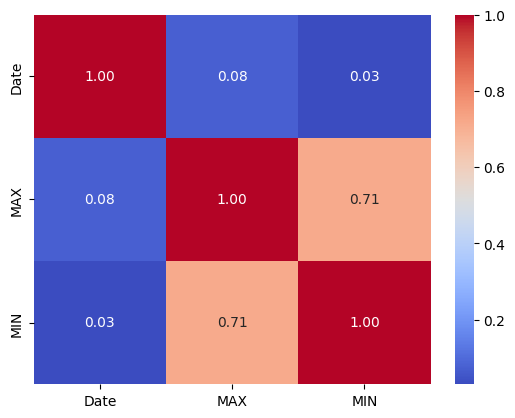

In [18]:
import seaborn as sns
corr_df = pd.DataFrame(corr_mat)
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f')

In [19]:
monthly_data=monthly_data.drop(['MIN'],axis=1)


C:\Users\dsmat\AppData\Local\Temp\ipykernel_16792\398430103.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_temp = monthly_data.resample('A').mean()


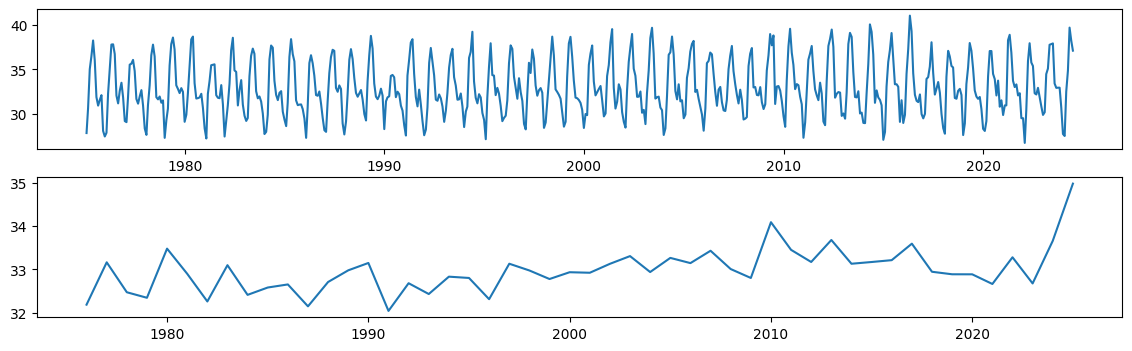

In [19]:
plt.rcParams['figure.figsize'] = [14, 4]
annual_temp = monthly_data.resample('A').mean()
fig, axes = plt.subplots(2,1)
axes[0].plot(monthly_data)
axes[1].plot(annual_temp)

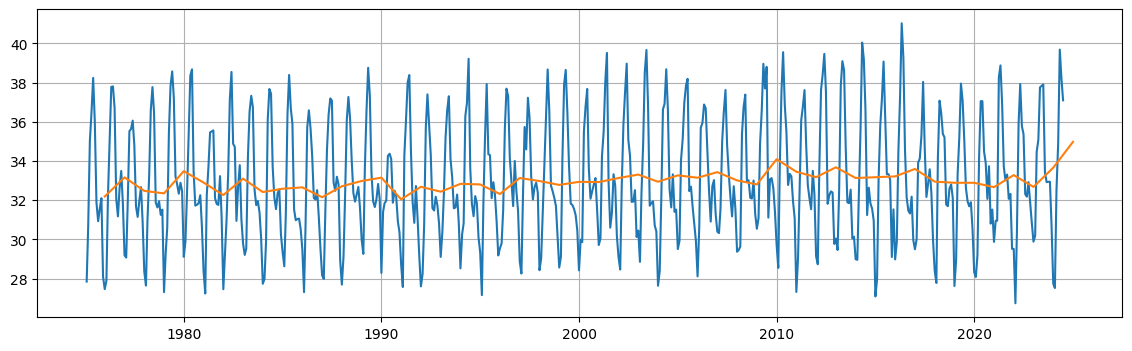

In [20]:
plt.plot(monthly_data)
plt.plot(annual_temp)
plt.grid()

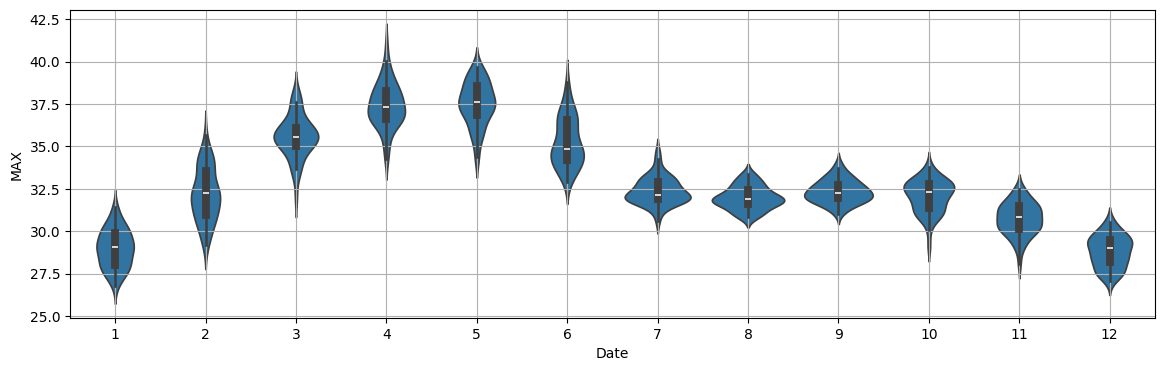

In [21]:
sns.violinplot(x=monthly_data.index.month, y=monthly_data.MAX)
plt.grid()

1996 -2016

In [20]:
f96_16 = monthly_data['1996-01-01':'2017-01-01']
f17_23 = monthly_data['2017-01-01':'2024-01-01' ]

In [21]:
f96_16.head()
f17_23.tail()

,MAX
Date,
2023-08-31,32.917241
2023-09-30,32.936667
2023-10-31,32.938710
2023-11-30,30.716667
2023-12-31,27.741935


In [24]:
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic           -4.160344
p-value                   0.000768
Lags Used                15.000000
Observations Used       236.000000
Critical Value (1%)      -3.458366
Critical Value (5%)      -2.873866
Critical Value (10%)     -2.573339
dtype: float64


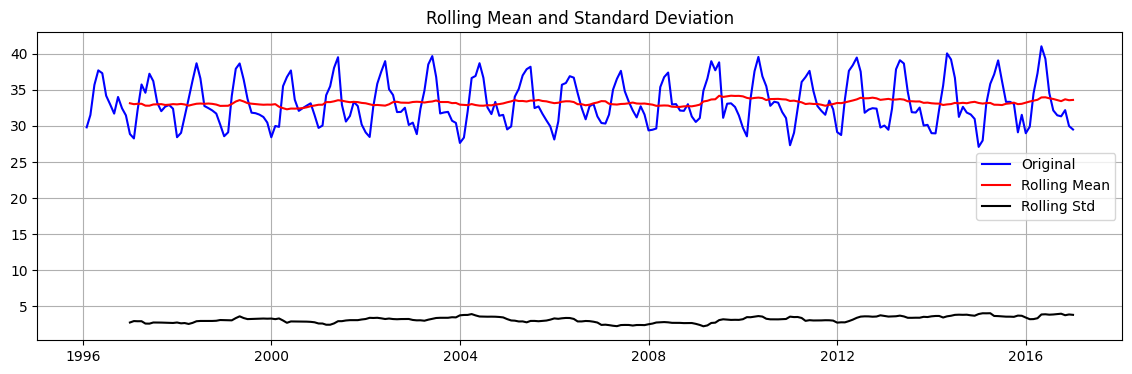

In [25]:
dftest(f96_16.MAX)


In [218]:
# Important to note that values have strong seasonality and adf test as well as rolling mean may not capture this.
# That is why it is always important to pay attention to run sequence plot
# f75_85['lag_12'] = f75_85.shift(12)
# f75_85['seasonal_diff'] = f75_85["MAX"] - f75_85['lag_12']

# fig,axes = plt.subplots(2,1)
# axes[0].plot(f75_85.MAX,label ='original')
# axes[1].plot(f75_85.seasonal_diff,label = 'seasonal diff')

In [219]:
# dftest(f75_85["seasonal_diff"].dropna())


In [220]:
# f75_85.reset_index(inplace=True)

In [221]:
# f75_85.head()

In [22]:
train = f96_16.iloc[:-12]
test = f96_16.iloc[-12:]

In [27]:
train.head(13)

,MAX
Date,
1996-01-31,29.793333
1996-02-29,31.510345
1996-03-31,35.677419
1996-04-30,37.686667
1996-05-31,37.293548
1996-06-30,34.175862
1996-07-31,32.970968
1996-08-31,31.696774
1996-09-30,34.000000


In [224]:
test.head(12)

,MAX
Date,
1985-01-31,28.625806
1985-02-28,31.253571
1985-03-31,36.387097
1985-04-30,38.386667
1985-05-31,36.700000
1985-06-30,35.896667
1985-07-31,31.519355
1985-08-31,30.977419
1985-09-30,31.036667


x = x - min/max-min

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaler_train = scaler.transform(train)
scaler_test = scaler.transform(test)

In [24]:
scaler_train.shape


(240, 1)

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [26]:
scaler_train[12]

array([0.09029901])

In [27]:
n_input = 12
generator = TimeseriesGenerator(scaler_train, scaler_train, length=n_input, batch_size=1)


In [28]:
print(type(generator))
generator[0]


<class 'keras.src.legacy.preprocessing.sequence.TimeseriesGenerator'>


(array([[[0.20894048],
         [0.34150583],
         [0.66323327],
         [0.81836128],
         [0.78800978],
         [0.54730249],
         [0.45427618],
         [0.35589949],
         [0.53372471],
         [0.41243496],
         [0.33710414],
         [0.13772737]]]),
 array([[0.09029901]]))

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM , Dropout
from tensorflow.keras.utils import plot_model


In [35]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

Model 2 low acc then above 

In [37]:
# model=Sequential()
# model.add(LSTM(100,return_sequences=True,input_shape=(12,1)))
# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

MODEL 3 good rmse with r2 = 0.85

In [42]:
# model = Sequential()

# # First LSTM layer with 128 neurons
# model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_input, 1)))

# # Second LSTM layer with 64 neurons
# model.add(LSTM(64, activation='relu', return_sequences=True))

# # Third LSTM layer with 32 neurons
# model.add(LSTM(32, activation='relu'))

# # Dropout for regularization
# model.add(Dropout(0.2))

# # Fully connected layer with 16 neurons
# model.add(Dense(16, activation='relu'))

# # Output layer
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# model.summary()

Model 4  rmse =0.9286180138677326 r2 = 0.91


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

# First LSTM layer with 128 neurons
model.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(n_input, 1)))

# Second LSTM layer with 64 neurons (reduced depth for better stability)
model.add(LSTM(64, activation='tanh'))

# Dropout for regularization (slightly reduced)
model.add(Dropout(0.1))

# Fully connected layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 12, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file="model_plot.png")


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [105]:
model.compile(optimizer='adam', loss='mse')


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss',patience=2)


In [ ]:
model.fit(generator,epochs=200,callbacks=[early_stop])

Epoch 1/200


222/228 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8641e-04
Epoch 1: loss improved from inf to 0.00020, saving model to lstm_4_layer_96_15_save.keras
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8682e-04
Epoch 2/200
 40/228 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5626e-04

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


213/228 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0935e-04
Epoch 2: loss did not improve from 0.00020
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1038e-04
Epoch 3/200
215/228 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4596e-04
Epoch 3: loss did not improve from 0.00020
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4500e-04
Epoch 4/200
227/228 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1826e-04
Epoch 4: loss did not improve from 0.00020
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1893e-04
Epoch 5/200
223/228 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3258e-04
Epoch 5: loss did not improve from 0.00020
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3320e-04
Epoch 6/200
211/228 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1064e-04
Epoch 6: loss did not improve from 0.00020
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1264e-04
Epoch 7/200
222/228 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6068e-04
Epoch 7: loss did not improve from 0.00020
228/228 ━━━━━━━━━━━━━━

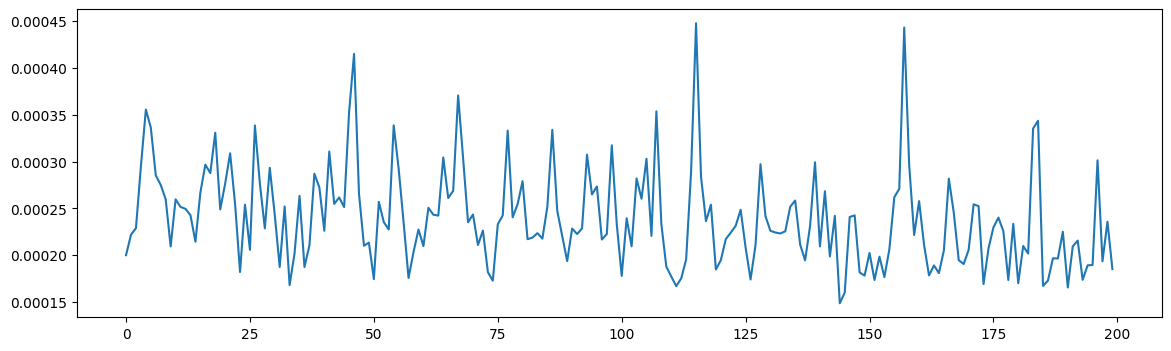

In [113]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [114]:
model.save('lstm_4_layer_96_15.h5')

In [23]:
last_train_batch = scaler_train[-12:]


In [24]:
last_train_batch = last_train_batch.reshape((1, n_input, 1))


In [117]:
model.predict(last_train_batch)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


array([[0.2549035]], dtype=float32)

In [118]:
scaler_test[0]


array([0.21634868])

In [1]:
from tensorflow.keras.models import load_model
model = load_model('lstm_4_layer_96_15.h5', compile=False)  

## This prediction is for year 2016

In [48]:
test_predictions = []

first_eval_batch = scaler_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, 1))

In [49]:
for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [50]:
test_predictions

[array([0.2549035], dtype=float32),
 array([0.47568187], dtype=float32),
 array([0.75708395], dtype=float32),
 array([0.9772612], dtype=float32),
 array([0.7249599], dtype=float32),
 array([0.62083644], dtype=float32),
 array([0.30867174], dtype=float32),
 array([0.4080484], dtype=float32),
 array([0.37541994], dtype=float32),
 array([0.31528264], dtype=float32),
 array([0.25672212], dtype=float32),
 array([0.09389299], dtype=float32)]

In [51]:
test.head()

,MAX
Date,
2016-01-31,29.889286
2016-02-29,34.492857
2016-03-31,37.300000
2016-04-30,41.023333
2016-05-31,39.280000


In [52]:
true_predictions = scaler.inverse_transform(test_predictions)


In [53]:
test['Predictions'] = true_predictions


C:\Users\dsmat\AppData\Local\Temp\ipykernel_7100\2515899287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

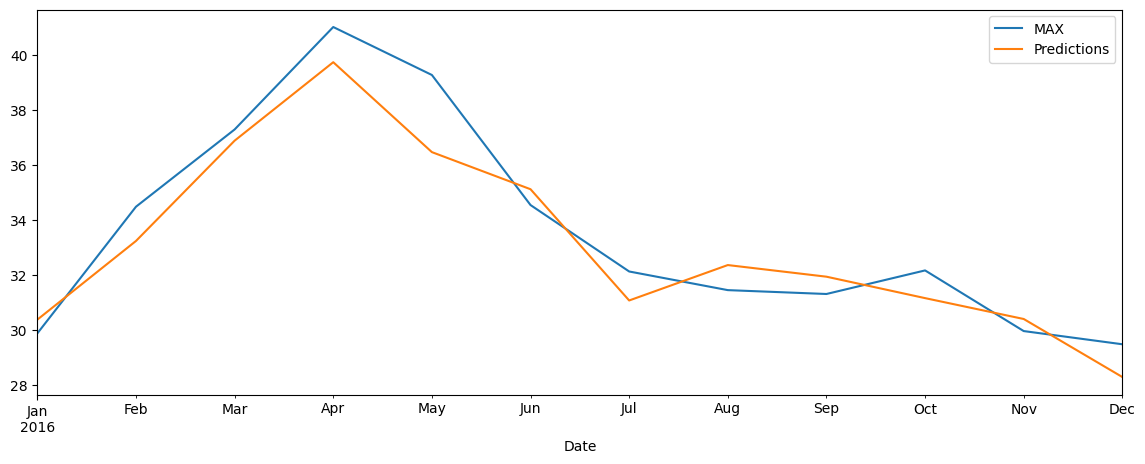

In [54]:
test.plot(figsize=(14,5))


In [37]:

from sklearn.metrics import mean_squared_error
from math import sqrt



In [55]:
from sklearn.metrics import r2_score
r2_score(test['MAX'],test['Predictions']),
mean_squared_error(test['MAX'],test['Predictions'])


1.395434212437804

Prediction With rmse and r2 for year 86

In [166]:
current_batch_copy = current_batch.copy()


In [40]:
f17_23.head()
f16_20 = monthly_data['2016-01-01':'2021-01-01']
f16_20.head()

,MAX
Date,
2016-01-31,29.889286
2016-02-29,34.492857
2016-03-31,37.300000
2016-04-30,41.023333
2016-05-31,39.280000


In [31]:
f16_20.tail()

,MAX
Date,
2020-08-31,32.064516
2020-09-30,33.730000
2020-10-31,30.803448
2020-11-30,31.520000
2020-12-31,29.870968


# Start Case 1

in this perticular case we build a model on previous 20 year data and try to predict next 5 year for to predict any other years we had to retrain our model which is better in term of accuracy 

Prediction from year 16 to 20 

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt
k = 2016
first_eval_batch = scaler_train[-n_input:] #here we taken 12 month input data of 2015 to predict 2016
current_batch = first_eval_batch.reshape((1, n_input, 1))
pred = np.array([])
for j in range(0 , 60  , 12) :
    test_predictions = []

    
    for i in range(12):
    
        # get the prediction value for the first batch
        current_pred = model.predict(current_batch,verbose=0)[0]

        # append the prediction into the array
        test_predictions.append(current_pred) 

        # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    pred = np.append(pred , true_predictions)
    test_ = f16_20.iloc[j:j+12].copy()
    test_['Predictions'] = true_predictions
    print(f" r2 & RMSE for {k} year: ")
    rmse=sqrt(mean_squared_error(test_['MAX'],test_['Predictions']))
    
    r2 =r2_score(test_['MAX'],test_['Predictions'])
    print(f'{r2} , {rmse}')
    k += 1

 r2 & RMSE for 2016 year: 
0.8956535438102804 , 1.1812849835826256
 r2 & RMSE for 2017 year: 
0.7644083179210607 , 1.2217281505126407
 r2 & RMSE for 2018 year: 
0.6698842537150765 , 1.6637642530695582
 r2 & RMSE for 2019 year: 
0.9447379554181834 , 0.6752697086503628
 r2 & RMSE for 2020 year: 
0.44456121396998394 , 2.073712660047798


In [46]:
f16_20['Predictions'] = pred

C:\Users\dsmat\AppData\Local\Temp\ipykernel_7100\301958657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f16_20['Predictions'] = pred


Plot for Case 1

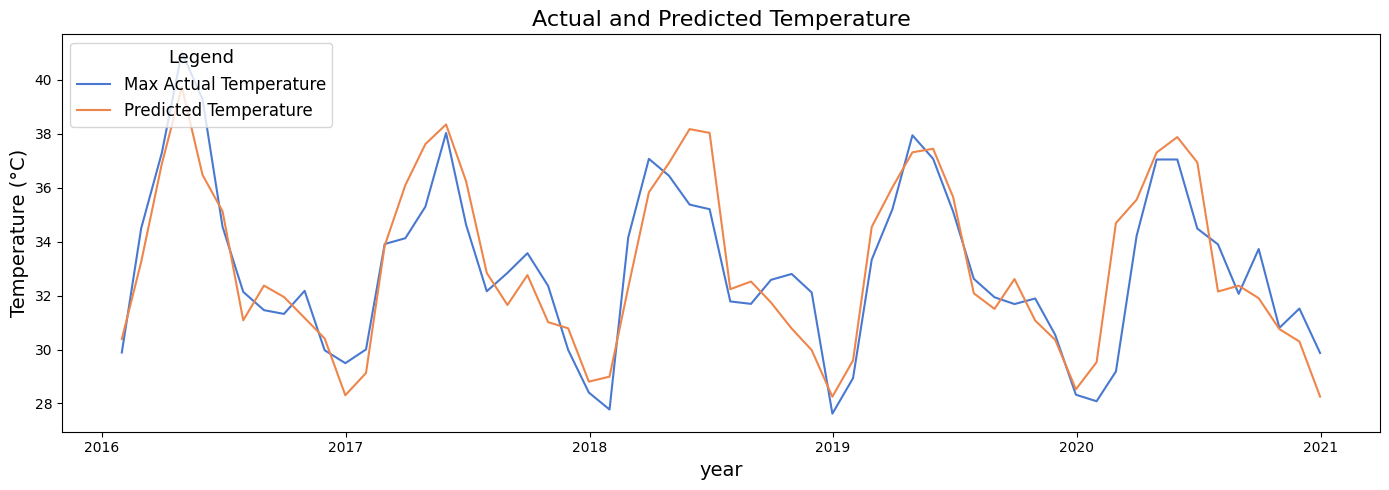

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

palette = sns.color_palette("muted")

plt.plot(f16_20['MAX'], label='Max Actual Temperature', color=palette[0], linewidth=1.5)
plt.plot(f16_20['Predictions'], label='Predicted Temperature ', color=palette[1], linewidth=1.5)

plt.title('Actual and Predicted Temperature', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend(title='Legend', fontsize=12, title_fontsize=13, loc='upper left')
# plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.tight_layout()

# Save the figure to a file
plt.savefig('temperature_plot.png', dpi=300)  # Change filename and dpi as needed

plt.show()

# case 1 End 

*********

from year 87 to 96

In [ ]:
k = 2017
pred = np.array([])
for j in range(0 , 84 , 12) :
    test_predictions = []

    
    for i in range(12):
    
        # get the prediction value for the first batch
        current_pred = model.predict(current_batch,verbose=0)[0]

        # append the prediction into the array
        test_predictions.append(current_pred) 

        # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    pred = np.append(pred , true_predictions)
    test_ = f17_23.iloc[j:j+12].copy()
    test_['Predictions'] = true_predictions
    print(f" r2 & RMSE for {k} year: ")
    rmse=sqrt(mean_squared_error(test_['MAX'],test_['Predictions']))
    
    r2 =r2_score(test_['MAX'],test_['Predictions'])
    print(f'{r2} , {rmse}')
    k += 1

 r2 & RMSE for 2017 year: 
0.7644083179210607 , 1.2217281505126407
 r2 & RMSE for 2018 year: 
0.6698842537150765 , 1.6637642530695582
 r2 & RMSE for 2019 year: 
0.9447379554181834 , 0.6752697086503628
 r2 & RMSE for 2020 year: 
0.44456121396998394 , 2.073712660047798
 r2 & RMSE for 2021 year: 
0.632071027339477 , 1.8437392618720836
 r2 & RMSE for 2022 year: 
0.6316788890431138 , 1.816520951338152
 r2 & RMSE for 2023 year: 
0.8792771431904488 , 1.062708788408281


In [169]:
f17_23['Predictions'] = pred

C:\Users\dsmat\AppData\Local\Temp\ipykernel_16792\3152441763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f17_23['Predictions'] = pred


<Axes: xlabel='Date'>

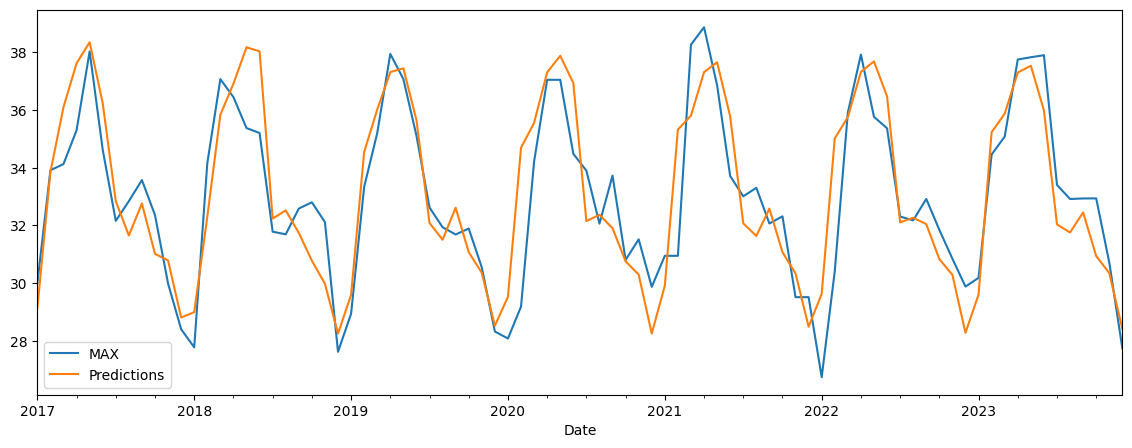

In [170]:
f17_23.plot(figsize=(14,5))


In [171]:
current_batch_copy2 =  current_batch_copy.copy()

In [172]:
f24 = monthly_data['2024-01-01':].copy()
len(f24)

6

In [173]:
test_predictions = []

for i in range(0,len(f24)):
    
        # get the prediction value for the first batch
        current_pred = model.predict(current_batch,verbose=0)[0]

        # append the prediction into the array
        test_predictions.append(current_pred) 

        # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
f24['Predictions'] = true_predictions
print(f" r2 & RMSE for {k} year: ")
rmse=sqrt(mean_squared_error(f24['MAX'],true_predictions))
r2 =r2_score(f24['MAX'],true_predictions)
print(f'{r2} , {rmse}')



 r2 & RMSE for 2024 year: 
0.8236974624235986 , 1.7040263472129322


<Axes: xlabel='Date'>

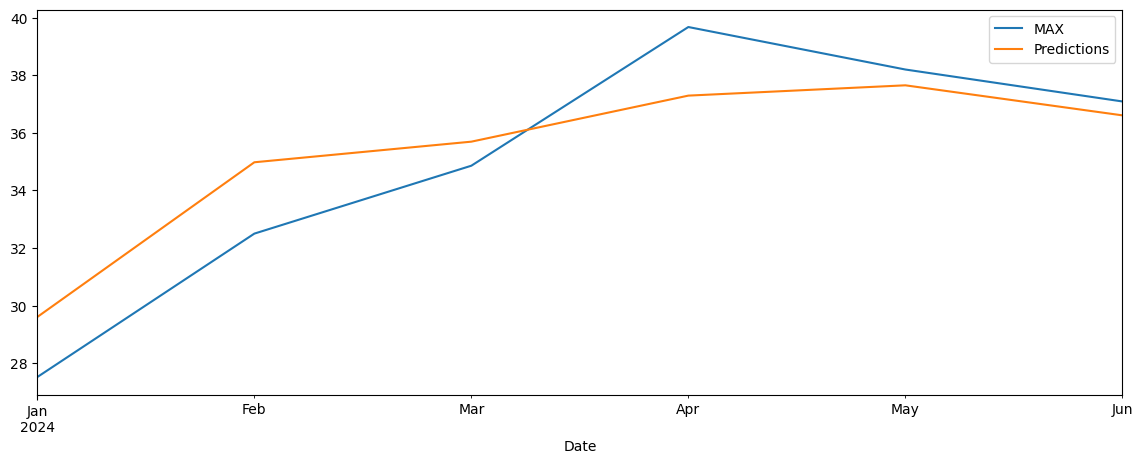

In [174]:
f24.plot(figsize=(14,5))

# Case 2

here in this case we are taking one random year data and try to predict next 5 data by using this data 

take 2016 data and predict from 2017-2021

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt

f16 = monthly_data['2016-01-01':'2017-01-01'].copy()
f16_scale = scaler.transform(f16)
f17_21 = monthly_data['2017-01-01':'2022-01-01'].copy()
k = 2017
f16 = np.array(f16_scale)
current_batch = f16.reshape((1, n_input, 1))
pred = np.array([])
for j in range(0 , 60  , 12) :
    test_predictions = []

    
    for i in range(12):
    
        # get the prediction value for the first batch
        current_pred = model.predict(current_batch,verbose=0)[0]

        # append the prediction into the array
        test_predictions.append(current_pred) 

        # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    pred = np.append(pred , true_predictions)
    test_ = f17_21.iloc[j:j+12].copy()
    test_['Predictions'] = true_predictions
    print(f" r2 & RMSE for {k} year: ")
    rmse=sqrt(mean_squared_error(test_['MAX'],test_['Predictions']))
    
    r2 =r2_score(test_['MAX'],test_['Predictions'])
    print(f'{r2} , {rmse}')
    k += 1

 r2 & RMSE for 2017 year: 
0.7091219764093308 , 1.3575319500423229
 r2 & RMSE for 2018 year: 
0.7358826735177822 , 1.488185658821355
 r2 & RMSE for 2019 year: 
0.9012485224686599 , 0.9026836893325687
 r2 & RMSE for 2020 year: 
0.4968494978356728 , 1.9736922362032205
 r2 & RMSE for 2021 year: 
0.6180661143696198 , 1.8785017572167795


In [43]:
f17_21['Predictions'] = pred

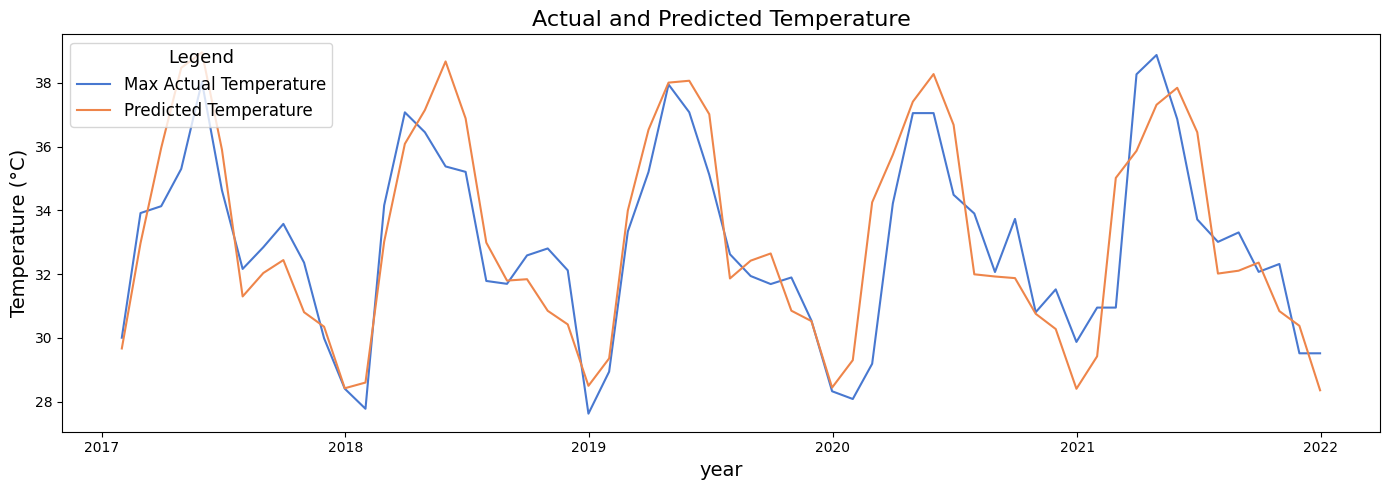

taken 2017 data and predict 2018 to 2022

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt

f17 = monthly_data['2017-01-01':'2018-01-01'].copy()
f17_scale = scaler.transform(f17)
f18_22 = monthly_data['2018-01-01':'2023-01-01'].copy()
k = 2018
f17 = np.array(f17_scale)
current_batch = f17.reshape((1, n_input, 1))
pred = np.array([])
for j in range(0 , 60  , 12) :
    test_predictions = []

    
    for i in range(12):
    
        # get the prediction value for the first batch
        current_pred = model.predict(current_batch,verbose=0)[0]

        # append the prediction into the array
        test_predictions.append(current_pred) 

        # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    pred = np.append(pred , true_predictions)
    test_ = f18_22.iloc[j:j+12].copy()
    test_['Predictions'] = true_predictions
    print(f" r2 & RMSE for {k} year: ")
    rmse=sqrt(mean_squared_error(test_['MAX'],test_['Predictions']))
    
    r2 =r2_score(test_['MAX'],test_['Predictions'])
    print(f'{r2} , {rmse}')
    k += 1

 r2 & RMSE for 2018 year: 
0.5797714142753958 , 1.8771607489488116
 r2 & RMSE for 2019 year: 
0.7497696216913061 , 1.43692403885463
 r2 & RMSE for 2020 year: 
-0.4223221640281265 , 3.318405590592989
 r2 & RMSE for 2021 year: 
0.5527456250604472 , 2.032800733569563
 r2 & RMSE for 2022 year: 
-0.1732085781950814 , 3.2420127629141593


In [53]:
f18_22['Predictions'] = pred

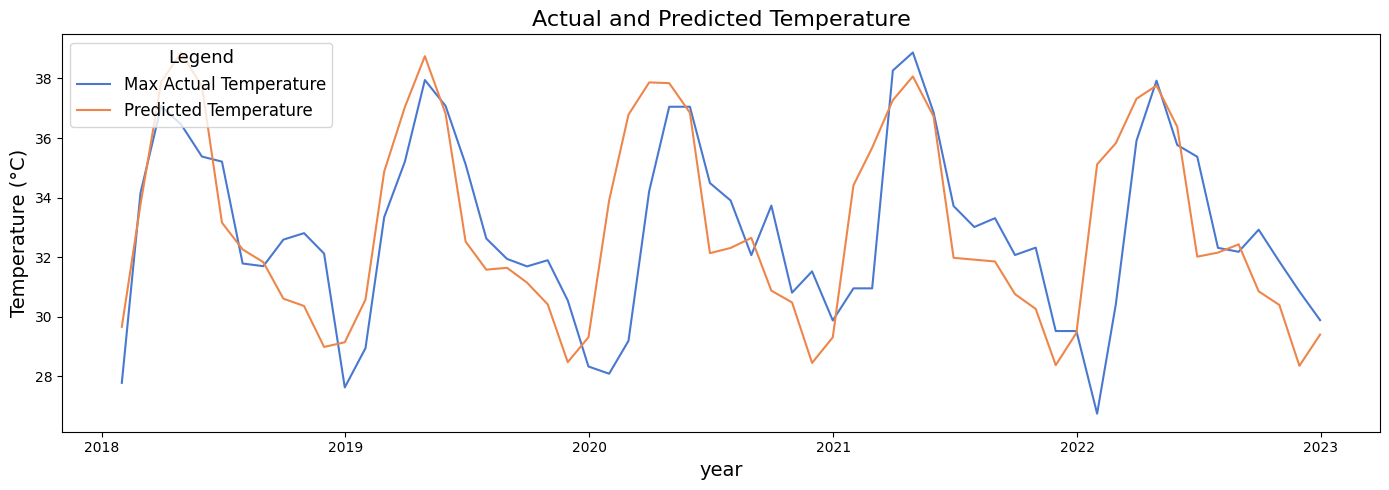

In [54]:

plt.figure(figsize=(14, 5))
palette = sns.color_palette("muted")

plt.plot(f18_22['MAX'], label='Max Actual Temperature', color=palette[0], linewidth=1.5)
plt.plot(f18_22["Predictions"], label='Predicted Temperature ', color=palette[1], linewidth=1.5)

plt.title('Actual and Predicted Temperature', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend(title='Legend', fontsize=12, title_fontsize=13, loc='upper left')
# plt.grid(visible=False, linestyle='--', alpha=0.5)

plt.tight_layout()

# Save the figure to a file
plt.savefig('temperature_plot.png', dpi=300)  # Change filename and dpi as needed

plt.show()

in second case noticed the comparative result are not as accurate as case one . this prediction is better in term of the coputation but not in point of view of accuracy.  